# Model Performance

### XGBoost
This model can be used for classification or regression.

#### Why Use It?
* Fast
* Very good performance on a wide range of problems
* Little data preprocessing needed
* Many parameters can be used to adjust model



#### Input Checklist
* Do I have enough samples? 
* Any missing values?
* Any outliers?
* Which features should I select?   
* Balanced data?

  
**Sample size**    
Small datasets - XGBoost may lead to overfitting. "Small" appears to be considered around or fewer than 500 data points.   
Large datasets - Good performance since XGBoost can handle any data size if it fits in memory. There is also a distributed version of XGBoost for larger datasets.   

**Missing values**  
You do not need to remove missing values. XGBoost takes data in as a sparse matrix; it can handle missing data well.  
Data doesn't need to be scaled or normalized. 

**Outliers**   
Outliers have minimal impact on the model. 

**Features**  
Features need to be numerical values.   
If the dataset has any categorical features, these need to be transformed into numerical values or one-hot encoded.  
For multicollinearity, best practice is to remove extra features from your model. However, this is less of an issue for decision tree algorithms.  
Use feature importance chart as feedback during your model iterations. 

**Balanced Data**  
XGBoost has a hyperparameter you can adjust to scale the model and over-correct for errors made during training on the positive class.   
Use `scale_pos_weight` to handle imbalanced data.

In [1]:
# Input Example 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

pd.set_option('display.max_columns', None)

# Load the iris dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))
df = df.sample(frac=1, random_state=10).reset_index(drop=True) # this is not needed
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,2.3,4.4,1.3,Iris-versicolor
1,6.4,2.7,5.3,1.9,Iris-virginica
2,5.4,3.7,1.5,0.2,Iris-setosa
3,6.1,3.0,4.6,1.4,Iris-versicolor
4,5.0,3.3,1.4,0.2,Iris-setosa


In [2]:
# Things to Check

# Look at summary of dataframe 
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


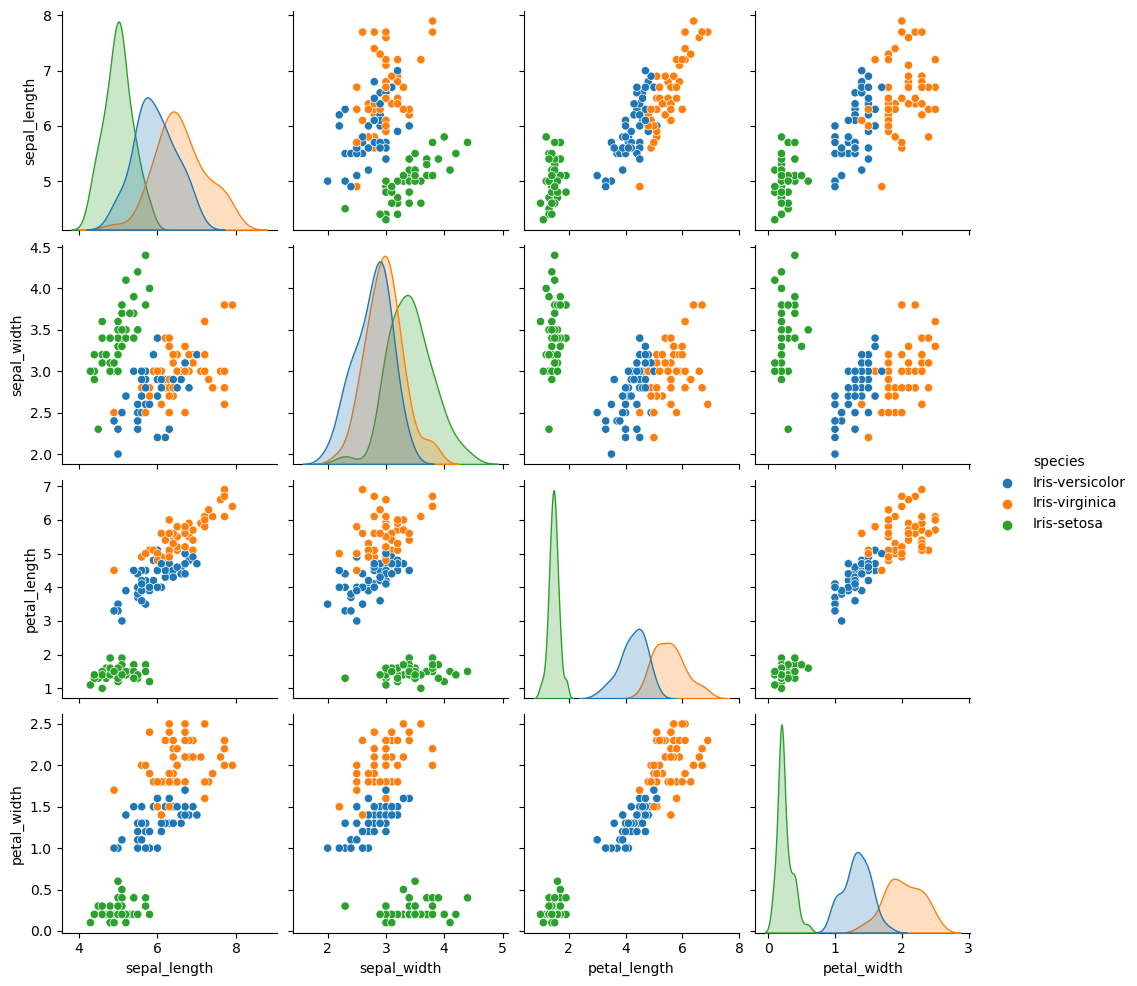

In [3]:
sns.pairplot(data=df, hue = 'species')

### Model

In [4]:
# Define features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
label = df['species']

# All values are numeric EXCEPT for the label
# We need to convert this to numeric

# use the sklearn LabelEncoder

# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(label)
label_encoded_y = label_encoder.transform(label)

X_train, X_test, y_train, y_test = train_test_split(features, label_encoded_y)
# default is test size 25%

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (112, 4)
X_test shape (38, 4)


In [5]:
# Set up the model - multiclassification

# you can print out the performance on your test set during training
# you need to tell it what evaluation metric you wnat
# includes rmse, auc, aucpr, etc
# https://xgboost.readthedocs.io/en/latest//parameter.html

model = XGBClassifier(random_state=100)
model.fit(X_train, y_train, eval_metric = ["mlogloss"], eval_set = [(X_train, y_train), (X_test, y_test)], verbose=10) # use verbose=n to print results after n iterations

# we are training the model on 75% of the data and evaluating the model at every training epoch on the 25% test dataset
# the log loss error is reporting after each iteration 
# evaluation on multiclass logloss (probability prediction) - lower is better

# validation_0 = eval_result for train
# validation_1 = eval_result for test

[0]	validation_0-mlogloss:0.72739	validation_1-mlogloss:0.76642
[10]	validation_0-mlogloss:0.05884	validation_1-mlogloss:0.26144
[20]	validation_0-mlogloss:0.02638	validation_1-mlogloss:0.28177
[30]	validation_0-mlogloss:0.02290	validation_1-mlogloss:0.28189
[40]	validation_0-mlogloss:0.02117	validation_1-mlogloss:0.28831
[50]	validation_0-mlogloss:0.02000	validation_1-mlogloss:0.29423
[60]	validation_0-mlogloss:0.01910	validation_1-mlogloss:0.29903
[70]	validation_0-mlogloss:0.01835	validation_1-mlogloss:0.30333
[80]	validation_0-mlogloss:0.01775	validation_1-mlogloss:0.30716
[90]	validation_0-mlogloss:0.01723	validation_1-mlogloss:0.31195
[99]	validation_0-mlogloss:0.01682	validation_1-mlogloss:0.31386


/Users/jmarlowe/opt/anaconda3/envs/cheatsheets/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=100, reg_alpha=0, ...)

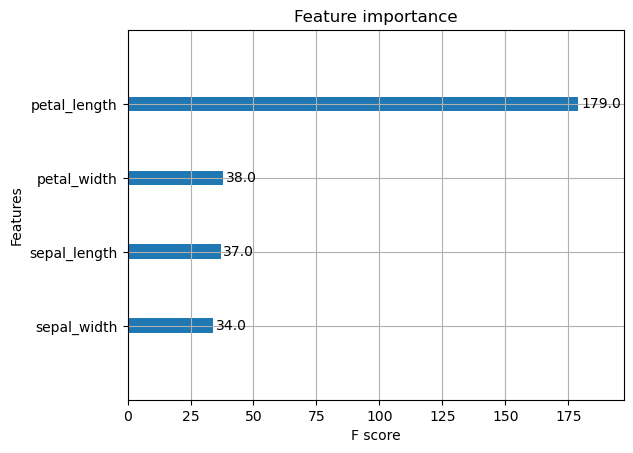

In [6]:
# Look at feature importance

# F score indicates how many times the feature was split on
# It's NOT the F1 score
plot_importance(model)

pyplot.show()

In [7]:
# Do some predictions
y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

# micro means it calculates based on the total true positives, false positives, and false negatives. It doesn't take into account metrics for each class. 
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

# macro means it calculates each class separately and then averages all of the scores
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

# weighted means the weighted average based on the number of samples for each class
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))

Confusion Matrix

[[10  0  0]
 [ 0  8  2]
 [ 0  0 18]]

Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.97
Macro Recall: 0.93
Macro F1-score: 0.95

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.90      1.00      0.95        18

    accuracy                           0.95        38
   macro avg       0.97      0.93      0.95        38
weighted avg       0.95      0.95      0.95        38



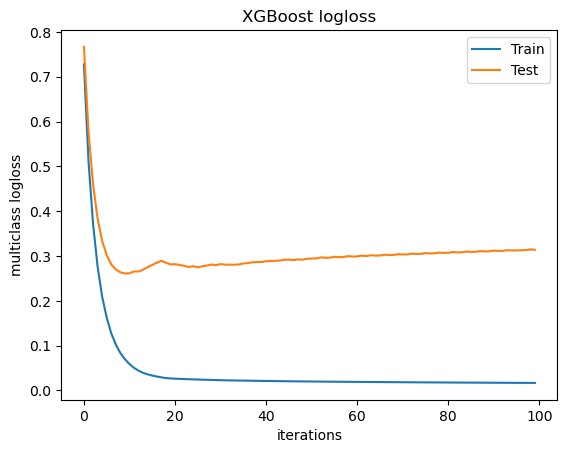

In [8]:
# Plot model evaluation results for log loss
history = model.evals_result_
x_axis = range(len(history['validation_0']['mlogloss']))
pyplot.plot(x_axis, history['validation_0']['mlogloss'], label='Train')
pyplot.plot(x_axis, history['validation_1']['mlogloss'], label='Test')
pyplot.legend(loc = 'best')
pyplot.xlabel('iterations')
pyplot.ylabel('multiclass logloss')
pyplot.title('XGBoost logloss')

pyplot.show()

### XGBoost parameters
There are a ton of hyperparameters available!

**What to do**
* Run model with defaults first
* Try adjusting _max_depth_, _learning_rate_, and _n_estimators_ (the number of model runs).
* These hyperparameters are the largest contributors to model complexity



**Control Overfitting: Try to simplify model**  
Add more randomness by setting _subsample_ to a value less than 1.  
Reduce _max_depth_ of each tree.  
Increase _min_child_weight_. 

**Control Underfitting: Add more complexity to model**  
Add more features.  
Increase _learning_rate_.  
Increase _max_depth_ of each tree.  
Decrease _min_child_weight_. 


**Handle imbalanced data**   
Use _scale_pos_weight_ to balance the positive / negative weights.  
scale_pos_weight = total_negative_examples / total_positive_examples


**Other things**  
You can use grid search from sklearn to find the optimal parameters.  
There is an stop parameter _early_stopping_rounds_ that can end the model if it is getting worse with each iteration.   
You can also use the SHAP package to visualize the features.

/Users/jmarlowe/opt/anaconda3/envs/cheatsheets/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


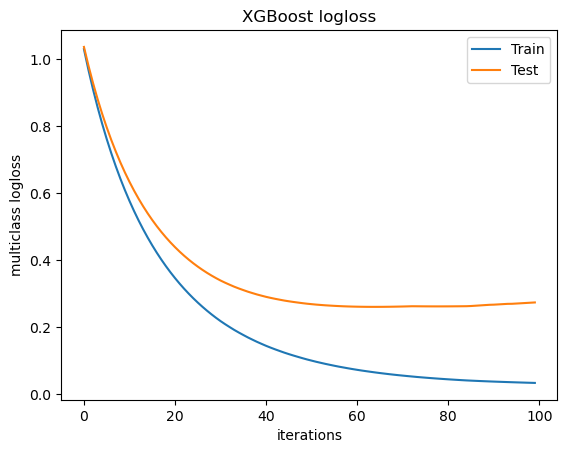

In [9]:
# Try again - change hyperparameters to check performance
model2 = XGBClassifier(random_state=100, learning_rate = 0.05)
model2.fit(X_train, y_train, eval_metric = ["merror", "mlogloss"], eval_set = [(X_train, y_train), (X_test, y_test)], verbose=False)

# Plot model evaluation results for log loss
history = model2.evals_result_
x_axis = range(len(history['validation_0']['mlogloss']))
pyplot.plot(x_axis, history['validation_0']['mlogloss'], label='Train')
pyplot.plot(x_axis, history['validation_1']['mlogloss'], label='Test')
pyplot.legend(loc = 'best')
pyplot.xlabel('iterations')
pyplot.ylabel('multiclass logloss')
pyplot.title('XGBoost logloss')

pyplot.show()